#  Proyecto Final CNYT 

---
---
## Se escogio el Computador Cuantico IBMQ Ourense para todas las ejecuciones de los algoritmos

## 1.  A)   Ilustracion del Algoritmo de Deutsh

##  A) Tomemos la funcion $ f(x)=1 $
### 1.1  A)   Ilustracion en conjunto
<img src="Imagenes/fconstante.png">

## 1.2  A)   Calculo de Outputs , creacion de la matriz 
<img src="Imagenes/uf.png" width="25%">



\begin{matrix} & --------& \\
{\displaystyle | 0\rangle }---  & |\hspace{2.6cm}|&------{\displaystyle | 0\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 0\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 0 \oplus 1 = 1 \rangle }\\
&  -------- &\\
\end{matrix}

\begin{matrix}
& --------& \\
{\displaystyle | 0\rangle }---  & |\hspace{2.6cm}|&------{\displaystyle | 0\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 1\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 1 \oplus 1  = 0 \rangle }\\
&  -------- &\\
\end{matrix}

\begin{matrix}
& --------& \\
{\displaystyle | 1\rangle }---  & |\hspace{2.6cm}|&-------{\displaystyle | 1\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 0\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 0 \oplus 1= 1\rangle }\\
&  -------- &\\
\end{matrix}

\begin{matrix}
& --------& \\
{\displaystyle | 1\rangle }---  & |\hspace{2.6cm}|&----{\displaystyle | 1\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 1\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 1 \oplus 1=0\rangle }\\
&  -------- &\\
\end{matrix} 



### tal que $x$ es el qubit de la izquierda , $y $  el de la derecha 

## 1.3   A)   $$
\begin{array}{cc} 
\begin{array}&&&&   \hspace{0.5cm} 00 &01&10&11\\
\end{array}
\\
U_f=
\begin{array}{ccc}
00 \\
01 \\
10 \\
11 \\
\end{array}
\begin{bmatrix}
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.4cm} 0\\
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.4cm} 1\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1  & \hspace{0.4cm} 0\\
\end{bmatrix}
\end{array}
$$

## Lo cual parece que se esta negando el segundo qubit, por que sospecho que puede un circuito con la compuerta $X$ en el segundo alambre


In [3]:
from Matriz_Compleja.libreriamatrices import prodtensorial as ten,identidad, multmat as mult ,matrizcompleja as mc
from Simulador.simuladorcuantico import resultado as resultadoc
X=mc([[(0,0),(1,0)],[(1,0),(0,0)]])
ID=identidad(2)
ans=ten(ID,X)
print(ans)

[{0+0i}, {1+0i}, {0+0i}, {0+0i}]
[{1+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {1+0i}]
[{0+0i}, {0+0i}, {1+0i}, {0+0i}]



## 1.4  A)   Esto confirma por lo tanto el circuito de $U_f$ es siguiente:


ibmqfactory.load_account:WARNING:2020-05-24 12:39:34,971: Credentials are already in use. The existing account in the session will be replaced.


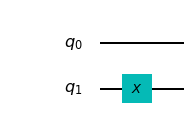

In [13]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
IBMQ.load_account()
F=QuantumCircuit(2)
F.x(1)
F.draw(output='mpl')

## 1.5  A)   Entonces procedemos a meter el circuito en una caja negra y a montar el circuito de Deutsch 

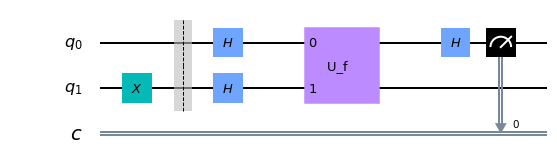

In [20]:
compuerta_uf=F.to_gate()
compuerta_uf.name="  U_f  "
circuito=QuantumCircuit(2,1)
circuito.x(1)
circuito.barrier()
circuito.h([0,1])
circuito.append(compuerta_uf,[0,1])
circuito.h(0)
circuito.measure([0],[0])
circuito.draw(output='mpl')

In [15]:
proveedor=IBMQ.get_provider('ibm-q')
comp_cuantico=proveedor.get_backend('ibmq_ourense')
ejecucion=execute(circuito,backend=comp_cuantico,shots=1)
resultado=ejecucion.result()
counts=resultado.get_counts()
print(counts)

{'0': 1}


## 1.6  A)   Resultados del Algoritmo de Deutsch

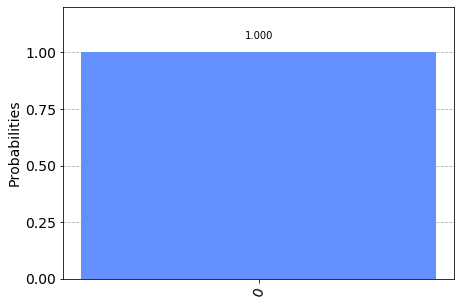

In [16]:
plot_histogram(counts)

## 1.7 A) Conclusiones

### Concluimos que la funcion es constante como deberia ser ya que en su mayoria colapsara al estado ${\displaystyle | 0\rangle }$




---
---
---

## 1.  B)   Ilustracion del Algoritmo de Deutsh

##  B ) Tomemos la funcion $ f(0)=1 , f(1)=0 $
### 1.1  B)   Ilustracion en conjunto
<img src="Imagenes/fb.png">

### 1.2  B)   Calculo de Outputs , creacion de la matriz 
<img src="Imagenes/uf.png" width="25%">



\begin{matrix} & --------& \\
{\displaystyle | 0\rangle }---  & |\hspace{2.6cm}|&------{\displaystyle | 0\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 0\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 0 \oplus 1 = 1 \rangle }\\
&  -------- &\\
\end{matrix}

\begin{matrix}
& --------& \\
{\displaystyle | 0\rangle }---  & |\hspace{2.6cm}|&------{\displaystyle | 0\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 1\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 1 \oplus 1  = 0 \rangle }\\
&  -------- &\\
\end{matrix}

\begin{matrix}
& --------& \\
{\displaystyle | 1\rangle }---  & |\hspace{2.6cm}|&-------{\displaystyle | 1\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 0\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 0 \oplus 0= 0\rangle }\\
&  -------- &\\
\end{matrix}

\begin{matrix}
& --------& \\
{\displaystyle | 1\rangle }---  & |\hspace{2.6cm}|&----{\displaystyle | 1\rangle }\\
& | \hspace{1cm}  U_f  \hspace{1cm} |& \\
{\displaystyle | 1\rangle }--- & |\hspace{2.6cm}|& --- {\displaystyle | 1 \oplus 0=1\rangle }\\
&  -------- &\\
\end{matrix} 

### tal que $x$ es el bit de la izquierda , $y $  el de la derecha 

## 1.3   A)   $$
\begin{array}{cc} 
\begin{array}&&&&   \hspace{0.5cm} 00 &01&10&11\\
\end{array}
\\
U_f=
\begin{array}{ccc}
00 \\
01 \\
10 \\
11 \\
\end{array}
\begin{bmatrix}
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.4cm} 0\\
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1  & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.4cm} 1\\
\end{bmatrix}
\end{array}
$$

## Parece que cambia el segundo qubit , si el primer qubit es 0 , es decir una compuerta CNOT con el control negado, por lo tanto necesitaremos una compuerta  X en el primer alambre , una CNOT con controlador arriba y nuevamente una compuerta X para dejar el qubit en el estado inicial

In [2]:
from Matriz_Compleja.libreriamatrices import prodtensorial as ten,identidad, multmat as mult ,matrizcompleja as mc
from Simulador.simuladorcuantico import resultado as resultadoc
X=mc([[(0,0),(1,0)],[(1,0),(0,0)]])
ID=identidad(2)
CNOT=mc([
        [(1,0),(0,0),(0,0),(0,0)],
        [(0,0),(1,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(1,0)],
        [(0,0),(0,0),(1,0),(0,0)]
    ])
XID=ten(X,ID)
ans=mult(CNOT,XID)
ans=mult(XID,ans)
print(ans)

[{0+0i}, {1+0i}, {0+0i}, {0+0i}]
[{1+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {1+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {1+0i}]



## 1.4  B)   Esto confirma por lo tanto el circuito de $U_f$ es siguiente:


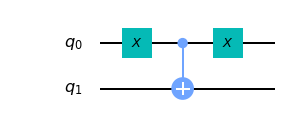

In [4]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
IBMQ.load_account()
F2=QuantumCircuit(2)
F2.x(0)
F2.cx(0,1)
F2.x(0)
F2.draw(output='mpl')

## 1.5  B)   Entonces procedemos a meter el circuito en una caja negra y a montar el circuito de Deutsch 

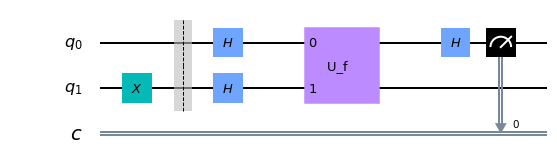

In [21]:
compuerta_uf=F2.to_gate()
compuerta_uf.name="  U_f  "
circuito2=QuantumCircuit(2,1)
circuito2.x(1)
circuito2.barrier()
circuito2.h([0,1])
circuito2.append(compuerta_uf,[0,1])
circuito2.h(0)
circuito2.measure([0],[0])
circuito2.draw(output='mpl')

In [6]:
proveedor=IBMQ.get_provider('ibm-q')
comp_cuantico=proveedor.get_backend('ibmq_ourense')
ejecucion=execute(circuito2,backend=comp_cuantico,shots=1024)
resultado=ejecucion.result()
counts=resultado.get_counts()
print(counts)

ibmqfactory.load_account:WARNING:2020-05-24 12:33:40,842: Credentials are already in use. The existing account in the session will be replaced.


{'1': 969, '0': 55}


## 1.6  B)   Resultados del Algoritmo de Deutsch

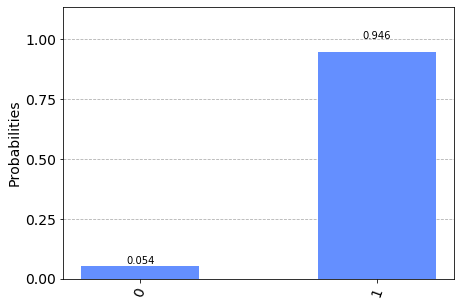

In [7]:
plot_histogram(counts)

## 1.7 B) Conclusiones

### Concluimos que la funcion es balanceada como deberia ser ya que en su mayoria NO colapsara al estado ${\displaystyle | 0\rangle }$ y si al estado ${\displaystyle | 1\rangle }$ 


In [6]:
proveedor=IBMQ.get_provider('ibm-q')
comp_cuantico=proveedor.get_backend('ibmq_ourense')
ejecucion=execute(circuito2,backend=comp_cuantico,shots=1024)
resultado=ejecucion.result()
counts=resultado.get_counts()
print(counts)

ibmqfactory.load_account:WARNING:2020-05-24 12:33:40,842: Credentials are already in use. The existing account in the session will be replaced.


{'1': 969, '0': 55}


## 1.6  B)   Resultados del Algoritmo de Deutsch

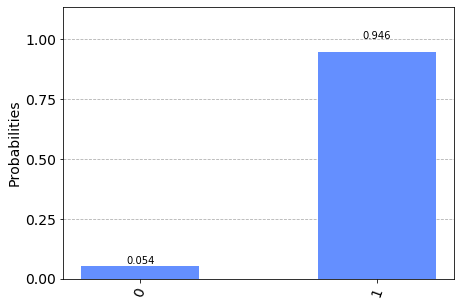

In [7]:
plot_histogram(counts)

---
---
---
# 2 Algoritmo de Deutsch-Jozsa

## A) Tomemos la funcion $f(\{0,1 \}^2) = 1$

### 2.1 A) Representancion de  Conjunto

<img src="Imagenes/f2c.png">





### 2.2 B) Calculo de outputs

<img src="Imagenes/uf2c.png">

### los qbits pasan de ser de arriba-abajo a izquierda-derecha  

## 2.3   A) Matriz $U_f$
## $$
\begin{array}{cc} 
\begin{array} 	 &&&   \hspace{1.4cm} {\tiny000} & {\tiny001} & {\tiny010} &{\tiny011} & {\tiny100} & {\tiny101} & {\tiny110} & {\tiny111} \\
\end{array}
\\
U_f=
\begin{array}{ccc}
000 \\
001 \\
010 \\
011 \\
100 \\
101 \\
110 \\
111 \\
\end{array}
\begin{bmatrix}
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 1 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 1  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 1 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 1\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 1 & \hspace{0.4cm} 0\\
\end{bmatrix}
\end{array}
$$

## Parece ser que se niega el ultimo qubit, para esto necesitaremos un compuerta $X$ en el tercer alambre

In [1]:
from Matriz_Compleja.libreriamatrices import prodtensorial as ten,identidad, multmat as mult ,matrizcompleja as mc
from Simulador.simuladorcuantico import resultado as resultadoc
X=mc([[(0,0),(1,0)],[(1,0),(0,0)]])
ID=identidad(2)
IDID=ten(ID,ID)
ans=ten(IDID,X)
print(ans)

[{0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}]



## 2.4  A)   Esto confirma por lo tanto el circuito de $U_f$ es siguiente:


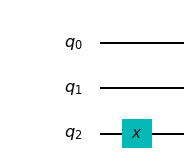

In [6]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
IBMQ.load_account()
F2c=QuantumCircuit(3)
F2c.x(2)
F2c.draw(output='mpl')

## 2.5  A)   Entonces procedemos a meter el circuito en una caja negra y a montar el circuito de Deutsch - Jozsa

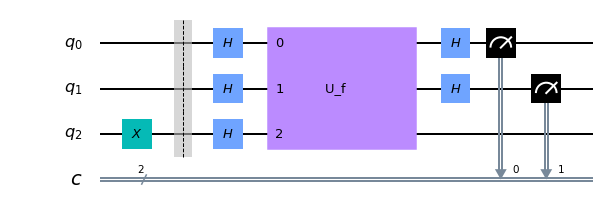

In [19]:
compuerta_uf=F2c.to_gate()
compuerta_uf.name="   U_f   "
circuito2q=QuantumCircuit(3,2)
circuito2q.x(2)
circuito2q.barrier()
circuito2q.h([0,1,2])
circuito2q.append(compuerta_uf,[0,1,2])
circuito2q.h([0,1])
circuito2q.measure([0,1],[0,1])
circuito2q.draw(output='mpl')

In [18]:
proveedor=IBMQ.get_provider('ibm-q')
comp_cuantico=proveedor.get_backend('ibmq_ourense')
ejecucion=execute(circuito2q,backend=comp_cuantico,shots=1)
resultado=ejecucion.result()
counts=resultado.get_counts()
print(counts)

{'00': 1}


## 2.6  A)   Resultados del Algoritmo de Deutsch-Jozsa

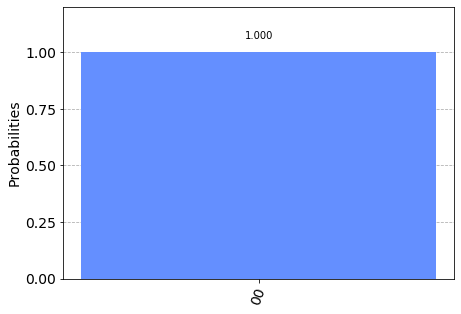

In [20]:
plot_histogram(counts)

## 2.7 A) Conclusiones

### Concluimos que la funcion es constante como deberia ser ya que colapsara al estado ${\displaystyle | 00\rangle }$ con mayoria

---
---
---

## B) Tomemos la funcion que determina si el numero binario es par o impar 
## $f(\{0,1 \}^2) = 0 $ si es par , $1$ si es impar (0 se considera como par )

### 2.1 B) Representancion de  Conjunto

<img src="Imagenes/f2qc.png">





### 2.2 B) Calculo de outputs

<img src="Imagenes/uf2qc.png">

### los qbits pasan de ser de arriba-abajo a izquierda-derecha  

## 2.3   A) Matriz $U_f$
## $$
\begin{array}{cc} 
\begin{array} 	 &&&   \hspace{1.4cm} {\tiny000} & {\tiny001} & {\tiny010} &{\tiny011} & {\tiny100} & {\tiny101} & {\tiny110} & {\tiny111} \\
\end{array}
\\
U_f=
\begin{array}{ccc}
000 \\
001 \\
010 \\
011 \\
100 \\
101 \\
110 \\
111 \\
\end{array}
\begin{bmatrix}
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 1 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 1 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 1  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 1\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 1 & \hspace{0.4cm} 0\\
\end{bmatrix}
\end{array}
$$

## Si el segundo qubit es 1 cambia el tercero, por lo que utilizaremos una compuerta CNOT con target en 3 alambre y controlador en el 2

In [21]:
from Matriz_Compleja.libreriamatrices import prodtensorial as ten,identidad, multmat as mult ,matrizcompleja as mc
from Simulador.simuladorcuantico import resultado as resultadoc
X=mc([[(0,0),(1,0)],[(1,0),(0,0)]])
CNOT=mc([
        [(1,0),(0,0),(0,0),(0,0)],
        [(0,0),(1,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(1,0)],
        [(0,0),(0,0),(1,0),(0,0)]
    ])
ID=identidad(2)
ans=ten(ID,CNOT)
print(ans)

[{1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}]



## 2.4  B)   Esto confirma por lo tanto el circuito de $U_f$ es siguiente:


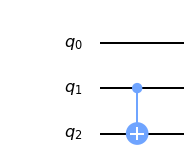

In [25]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
IBMQ.load_account()
F2qb=QuantumCircuit(3)
F2qb.cx(1,2)
F2qb.draw(output='mpl')

## 2.5  B)   Entonces procedemos a meter el circuito en una caja negra y a montar el circuito de Deutsch - Jozsa

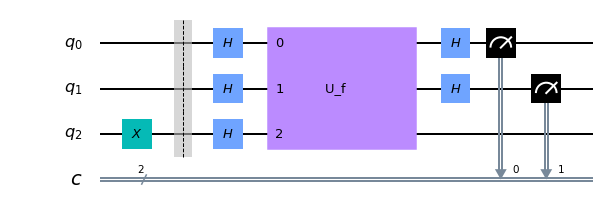

In [27]:
compuerta_uf=F2qb.to_gate()
compuerta_uf.name="   U_f   "
circuito2qb=QuantumCircuit(3,2)
circuito2qb.x(2)
circuito2qb.barrier()
circuito2qb.h([0,1,2])
circuito2qb.append(compuerta_uf,[0,1,2])
circuito2qb.h([0,1])
circuito2qb.measure([0,1],[0,1])
circuito2qb.draw(output='mpl')

In [28]:
proveedor=IBMQ.get_provider('ibm-q')
comp_cuantico=proveedor.get_backend('ibmq_ourense')
ejecucion=execute(circuito2qb,backend=comp_cuantico,shots=1024)
resultado=ejecucion.result()
counts=resultado.get_counts()
print(counts)

{'10': 951, '00': 50, '01': 3, '11': 20}


## 2.6  A)   Resultados del Algoritmo de Deutsch-Jozsa

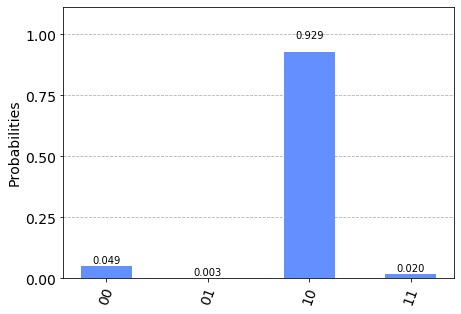

In [29]:
plot_histogram(counts)

## 2.7 B) Conclusiones

### Concluimos que la funcion es balanceada como deberia ser ya que es POCO probable que colapse al estado ${\displaystyle | 00\rangle }$, curiosamente si con mayoria en  ${\displaystyle | 10\rangle }$

---
----

---

# 3 Ilustrar el Algoritmo de Deutsch-Jozsa para 1 función con $n>=3$: 

## Pensemos en la funcion palindrome 

## $ f(\{0,1\}^3) = 1 $ si es palindrome , $ 0 $ de lo contrario

## 3.1 Representacion de Conjunto

<img src="Imagenes/fpalindrome.png">

## Calculo de outputs

<img src="Imagenes/ufpalindrome.png">


## 3.3   A) Matriz $U_f$
### $$
\begin{array}{cc} 
\begin{array} 	&&&  \hspace{2.2cm} {\tiny0000} & {\tiny0001} & {\tiny0010} &{\tiny0011} & 
 {\tiny0100} & {\tiny0101} & {\tiny0110} &{\tiny0111} &
 {\tiny1000} & {\tiny1001} & {\tiny1010} &{\tiny1011}  &
 {\tiny1100} & {\tiny1101} & {\tiny1110} &{\tiny1111} &
 \\
\end{array}
\\
U_f=
\begin{array}{ccc}
0000 \\
0001 \\
0010 \\
0011 \\
0100 \\
0101 \\
0110 \\
0111 \\
1000 \\
1001 \\
1010 \\
1011 \\
1100 \\
1101 \\
1110 \\
1111 \\
\end{array}
\begin{bmatrix}
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 1  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 1 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
1 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 1  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
1 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 1 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1   \hspace{0.2cm}\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm} & 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 0  \hspace{0.2cm}& 
0 & \hspace{0.2cm} 0 \hspace{0.2cm} & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0   \hspace{0.2cm}
\end{bmatrix}
\end{array}
$$

## 3.4 y 3.5 Parece ser que es una equivalencia, entre 0 y 2 combinado con un CNOT con target en 3, lo cual podemos hacer de la siguiente manera
## Los qubits en orden $ x , y , z, w  $ 
## si  $$   (x \equiv z )\equiv \neg ( x \oplus z) $$
## entonces $$  w \oplus \neg ( x \oplus z) $$
## y podemos intentar demostrar para estos casos particulares 
| ${\huge x}$ | ${\huge z}$ | ${\huge w}$ | ${\huge \hspace{2cm}  \neg ( x \oplus z) \oplus w}$ |
| --- | --- | --- |-----------|
| ${\huge 0}$ | ${\huge 0}$ | ${\huge 0}$ | ${\huge \hspace{2.2cm}  1    }$   |
| ${\huge 0}$ | ${\huge 0}$ | ${\huge 1}$ | ${\huge \hspace{2.2cm}  0    }$   |
| ${\huge 0}$ | ${\huge 1}$ | ${\huge 0}$ | ${\huge \hspace{2.2cm}  0    }$   |
| ${\huge 0}$ | ${\huge 1}$ | ${\huge 1}$ | ${\huge \hspace{2.2cm}  1    }$   |
| ${\huge 1}$ | ${\huge 0}$ | ${\huge 0}$ | ${\huge \hspace{2.2cm}  0    }$   |
| ${\huge 1}$ | ${\huge 0}$ | ${\huge 1}$ | ${\huge \hspace{2.2cm}  1    }$   |
| ${\huge 1}$ | ${\huge 1}$ | ${\huge 0}$ | ${\huge \hspace{2.2cm}  1    }$   |
| ${\huge 1}$ | ${\huge 1}$ | ${\huge 1}$ | ${\huge \hspace{2.2cm}  0    }$   |

## De esta tabla nos concentraremos en los valores que  $  \neg ( x \oplus z) \oplus w \not \equiv w$

## Serian las cadenas $000$ , $001$, $110$ , $111$ entonces podemos afirmar que para todas las cadenas de la forma $0x00$, $0x01$, $1x10$ y $1x11$  iran a parar a $0x01$, $0x00$, $1x11$ , $1x10$ respectivamente , y el resto de cadenas seguiran intactas.

| ${\huge Cadena}$ | ${\huge Resultado}$ |
| --- | --- |
| ${\huge |0|0|00|}$ | ${\huge 0001}$ |
| ${\huge |0|1|00|}$ | ${\huge 0101}$ |
| ${\huge |0|0|01|}$ | ${\huge 0000}$ |
| ${\huge |0|1|01|}$ | ${\huge 0100}$ |
| ${\huge |1|0|10|}$ | ${\huge 1011}$ |
| ${\huge |1|1|10|}$ | ${\huge 1111}$ |
| ${\huge |1|0|11|}$ | ${\huge 1010}$ |
| ${\huge |1|1|11|}$ | ${\huge 1110}$ |

<img src="Imagenes/Explicacion.PNG">

## Lo cual coincide con la tabla de $U_f$ , procedemos a generar el calculo
## 1. Con una compuerta CNOT de con target en 2 y control en 0 , negadola con una $X$ esto nos dara $  \neg ( x \oplus z)$

## 2. Con una compuerta CNOT con target en 3 y control en 2, nos dara $  w \oplus \neg ( x \oplus z)$

## 3. Le haremos "Rollback" al alambre 2 con una compuerta $X$ y CNOT (del #1).

### Para esto necesitamos un CNOT tradicional y uno diferente (el 1)  que es el que tiene el control en 0 y target en 2 que resulta ser este : 

## $$
\begin{array}{cc} 
\begin{array} 	 &&&   \hspace{4.5cm} {\tiny000} & {\tiny001} & {\tiny010} &{\tiny011} & {\tiny100} & {\tiny101} & {\tiny110} & {\tiny111} \\
\end{array}
\\
CNOT(0,2)=
\begin{array}{ccc}
000 \\
001 \\
010 \\
011 \\
100 \\
101 \\
110 \\
111 \\
\end{array}
\begin{bmatrix}
1 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 1 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 1  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 1 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 1  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 1 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 0\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.4cm} 1\\
0 & \hspace{0.2cm} 0 \hspace{0.2cm}& \hspace{0.2cm} 0  & \hspace{0.2cm} 0 & \hspace{0.2cm} 0 & \hspace{0.2cm} 0  & \hspace{0.2cm} 1 & \hspace{0.4cm} 0\\
\end{bmatrix}
\end{array}
$$

## Demostracion :

In [32]:
from Matriz_Compleja.libreriamatrices import prodtensorial as ten,identidad, multmat as mult ,matrizcompleja as mc
from Simulador.simuladorcuantico import resultado as resultadoc
X=mc([[(0,0),(1,0)],[(1,0),(0,0)]])
CNOTE=mc([
        [(1,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0)],
        [(0,0),(1,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0)],
        [(0,0),(0,0),(1,0),(0,0),(0,0),(0,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(1,0),(0,0),(0,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(0,0),(0,0),(1,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(0,0),(1,0),(0,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(1,0)],
        [(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(1,0),(0,0)],
    ])
CNOT=mc([
        [(1,0),(0,0),(0,0),(0,0)],
        [(0,0),(1,0),(0,0),(0,0)],
        [(0,0),(0,0),(0,0),(1,0)],
        [(0,0),(0,0),(1,0),(0,0)]
    ])
ID=identidad(2)
Bloque5=ten(CNOTE,ID)
Bloque4=ten(ten(ten(ID,ID),X),ID)
Bloque3=ten(ten(ID,ID),CNOT)
Bloque2=ten(ten(ten(ID,ID),X),ID)
Bloque1=ten(CNOTE,ID)
ans=mult(mult(mult(mult(Bloque5,Bloque4),Bloque3),Bloque2),Bloque1)
print(ans)

[{0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}]
[{0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, {1+0i}, {0+0i}, {0+0i}, {0+0i}, {0+0i}, 

<img src="Imagenes/Explicacion.PNG">

# Hemos acertado , es nuestro circuito !

## Ahora graficamente con compuertas tradicionales: 

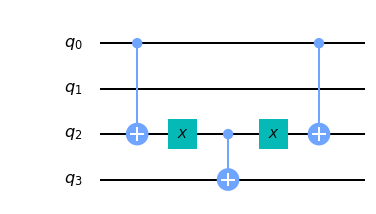

In [34]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
IBMQ.load_account()
F3qb=QuantumCircuit(4)
F3qb.cx(0,2)
F3qb.x(2)
F3qb.cx(2,3)
F3qb.x(2)
F3qb.cx(0,2)
F3qb.draw(output='mpl')

## 3.6    Entonces procedemos a meter el circuito en una caja negra y a montar el circuito de Deutsch-Jozsa 

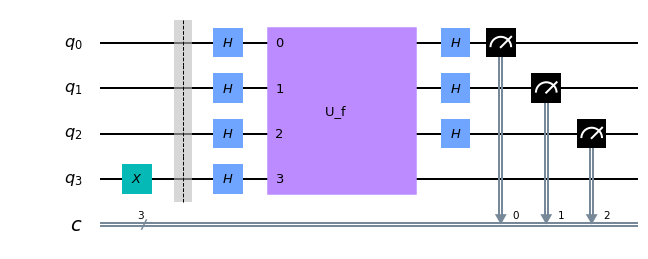

In [38]:
compuerta_uf=F3qb.to_gate()
compuerta_uf.name="   U_f   "
circuito3qb=QuantumCircuit(4,3)
circuito3qb.x(3)
circuito3qb.barrier()
circuito3qb.h([0,1,2,3])
circuito3qb.append(compuerta_uf,[0,1,2,3])
circuito3qb.h([0,1,2])
circuito3qb.measure([0,1,2],[0,1,2])
circuito3qb.draw(output='mpl')

In [36]:
proveedor=IBMQ.get_provider('ibm-q')
comp_cuantico=proveedor.get_backend('ibmq_ourense')
ejecucion=execute(circuito3qb,backend=comp_cuantico,shots=1024)
resultado=ejecucion.result()
counts=resultado.get_counts()
print(counts)

{'010': 32, '111': 135, '000': 79, '011': 36, '100': 178, '101': 456, '001': 72, '110': 36}


## 3.7  Resultados del Algoritmo de Deutsch-Jozsa

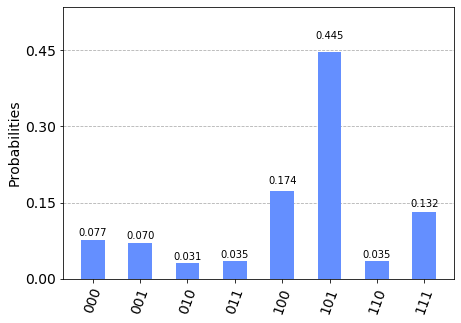

In [37]:
plot_histogram(counts)

# 3.8 Conclusiones : 
## Concluimos que la funcion es balanceada como deberia ser ya que es POCO probable que colapse al estado ${\displaystyle | 000\rangle }$, curiosamente si con mayoria en  ${\displaystyle | 101\rangle }$